In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

data = pd.read_csv('../data/인구현황.csv')
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

### 1. 지역 별 총인구수 Top5

In [3]:
result1 = (
    data.drop(index=0)
        .sort_values(by='총인구수', ascending=False)
        .loc[:, ['행정기관', '총인구수']]
        .head(5)
)
result1

,행정기관,총인구수
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380
4,인천광역시,3021010


### 1-1. 지역 별 총인구수 plot

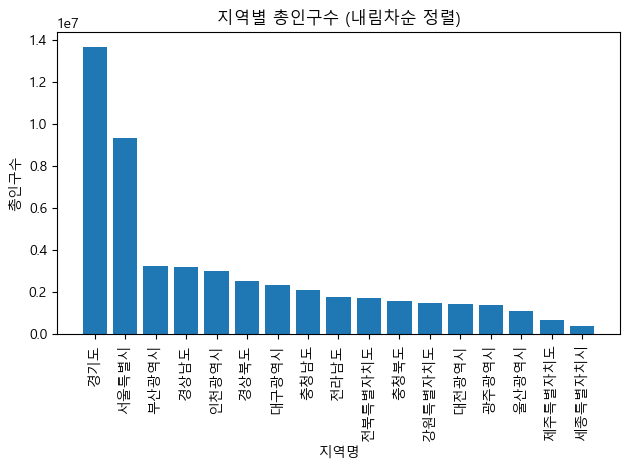

In [47]:
df = (
    data.drop(index=0)
        .sort_values(by='총인구수', ascending=False)
)

plt.figure()
plt.bar(df['행정기관'], df['총인구수'])
plt.xticks(rotation=90)
plt.xlabel('지역명')
plt.ylabel('총인구수')
plt.title('지역별 총인구수 (내림차순 정렬)')
plt.tight_layout()
plt.show()

-----

### 2. 세대당 인구수 높은 지역 Top5

In [4]:
result2 = (
    data.drop(index=0)
        .sort_values(by='세대당 인구', ascending=False)
        .loc[:, ['행정기관', '세대당 인구']]
        .head(5)
)
result2

,행정기관,세대당 인구
8,세종특별자치시,2.39
9,경기도,2.26
7,울산광역시,2.22
4,인천광역시,2.20
3,대구광역시,2.14


### 2.1 지역별 세대당 인구 Plot

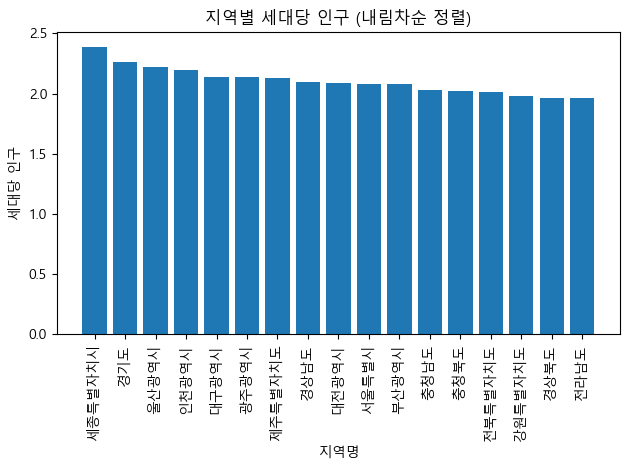

In [49]:
df = (
    data.drop(index=0)
        .sort_values(by='세대당 인구', ascending=False)
)

plt.figure()
plt.bar(df['행정기관'], df['세대당 인구'])
plt.xticks(rotation=90)
plt.xlabel('지역명')
plt.ylabel('세대당 인구')
plt.title('지역별 세대당 인구 (내림차순 정렬)')
plt.tight_layout()
plt.show()

---

### 3. 남여 비율 분석

In [5]:
result3 = (
    data.drop(index=0)
        .sort_values(by='남여 비율', ascending=False)
        .loc[:, ['행정기관', '남여 비율']]
)
result3

,행정기관,남여 비율
7,울산광역시,1.06
12,충청남도,1.05
11,충청북도,1.04
14,전라남도,1.02
15,경상북도,1.02
16,경상남도,1.02
10,강원특별자치도,1.01
9,경기도,1.01
17,제주특별자치도,1.00
4,인천광역시,1.00


### 3-1. 남여 비율 분석 Plot

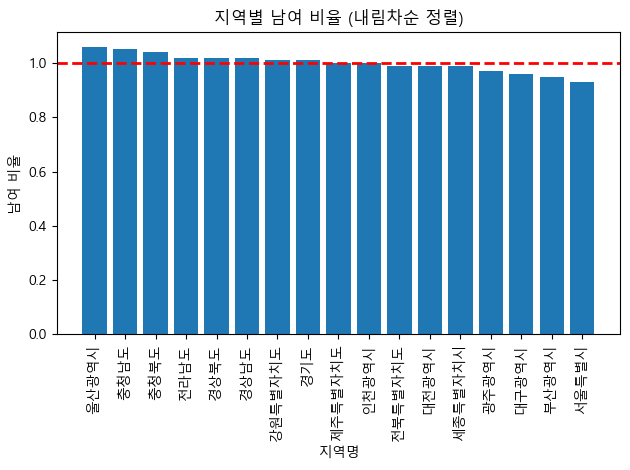

In [51]:
df = (
    data.drop(index=0)
        .sort_values(by='남여 비율', ascending=False)
)

plt.figure()
plt.bar(df['행정기관'], df['남여 비율'])
plt.xticks(rotation=90)
plt.axhline(y=1.0, linestyle='--', linewidth=2, color='red')
plt.xlabel('지역명')
plt.ylabel('남여 비율')
plt.title('지역별 남여 비율 (내림차순 정렬)')
plt.tight_layout()
plt.show()

---

### 4. 남자 초과 / 여자 초과 분석

In [6]:
result4 = (
    data.drop(index=0)
        .assign(
            성별구분=lambda x: x['남여 비율'].apply(
                lambda v: '남초' if v > 1 else ('여초' if v < 1 else '동일')
            )
        )
        .loc[:, ['행정기관', '남여 비율', '성별구분']]
)
result4

,행정기관,남여 비율,성별구분
1,서울특별시,0.93,여초
2,부산광역시,0.95,여초
3,대구광역시,0.96,여초
4,인천광역시,1.00,동일
5,광주광역시,0.97,여초
6,대전광역시,0.99,여초
7,울산광역시,1.06,남초
8,세종특별자치시,0.99,여초
9,경기도,1.01,남초
10,강원특별자치도,1.01,남초


---

### 5. 세대 당 인구 평균보다 높은 지역

In [7]:
result5 = (
    data.drop(index=0)
        .sort_values(by='세대당 인구', ascending=False)
        .loc[:, ['행정기관', '세대당 인구']]
        .query('`세대당 인구` > 2.11')
)
result5

,행정기관,세대당 인구
8,세종특별자치시,2.39
9,경기도,2.26
7,울산광역시,2.22
4,인천광역시,2.20
3,대구광역시,2.14
5,광주광역시,2.14
17,제주특별자치도,2.13


### 5-1. 남초/여초 개수 plot(seaborn의 coutplot)

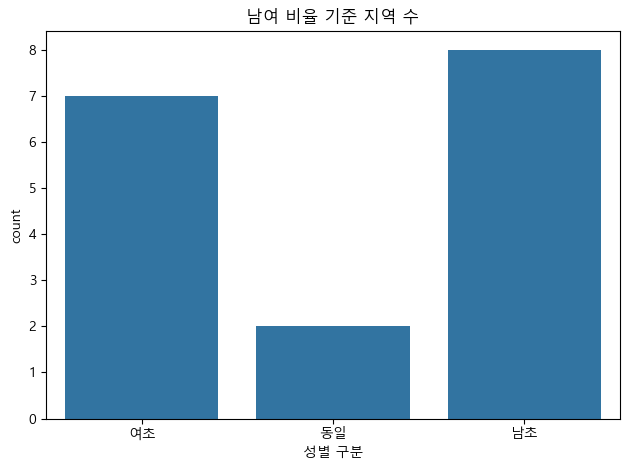

In [61]:
df['성별구분'] = df['남여 비율'].apply(
    lambda x: '남초' if x > 1 else ('여초' if x < 1 else '동일')
)

plt.figure()
sns.countplot(
    data=df,
    x='성별구분',
    order=['여초', '동일', '남초']
)
plt.xlabel('성별 구분')
plt.ylabel('count')
plt.title('남여 비율 기준 지역 수')
plt.tight_layout()
plt.show()

### 지역 별 세대수 Plot(Seaborn의 barplot)

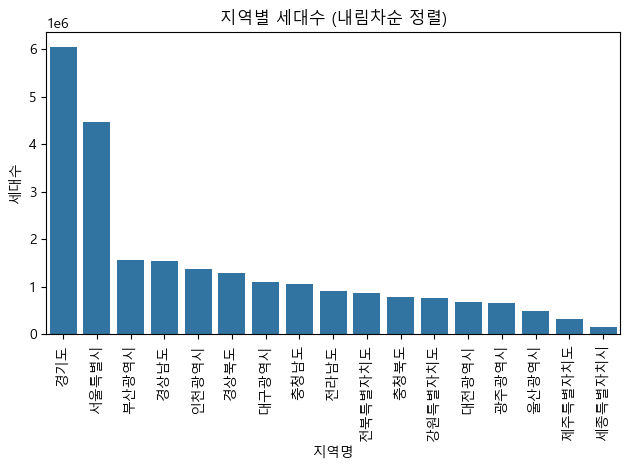

In [64]:
df = (
    data.drop(index=0)
        .sort_values(by='세대수', ascending=False)
)

plt.figure()
sns.barplot(
    data=df,
    x='행정기관',
    y='세대수',
)
plt.xticks(rotation=90)
plt.xlabel('지역명')
plt.ylabel('세대수')
plt.title('지역별 세대수 (내림차순 정렬)')
plt.tight_layout()
plt.show()

---

### 6. 남자 인구 / 여자 인구 비교 Plot

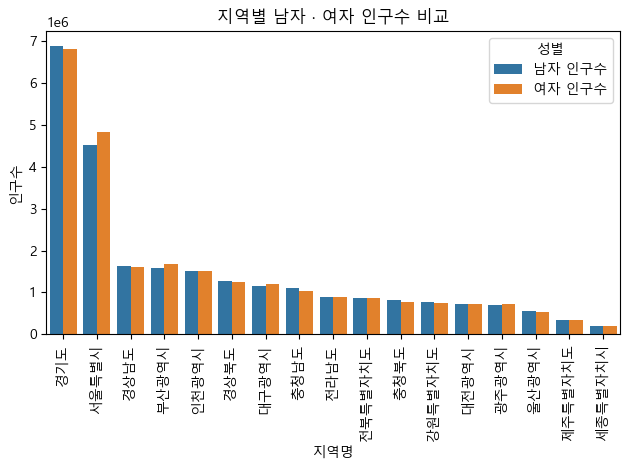

In [69]:
df = (
    data.drop(index=0)
        .sort_values(by='남자 인구수', ascending=False)
)

df_long = df.melt(
    id_vars='행정기관',
    value_vars=['남자 인구수', '여자 인구수'],
    var_name='성별',
    value_name='인구수'
)

plt.figure()
sns.barplot(
    data=df_long,
    x='행정기관',
    y='인구수',
    hue='성별'
)
plt.xticks(rotation=90)
plt.xlabel('지역명')
plt.ylabel('인구수')
plt.title('지역별 남자 · 여자 인구수 비교')
plt.tight_layout()
plt.show()